<a href="https://colab.research.google.com/github/RichardTwit/App_Project_SpringBoard/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/'


 bitcoin_analysis.csv
 bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
 CoinbaseWalletBackups
'CoinbaseWalletBackups (1)'
'Colab Notebooks'
'Copy of XMRScript.gscript'
'Getting started.pdf'
 IFTTT
'Keep kitchen dry.gdoc'
 twitter_dataset.csv
'Untitled document.gdoc'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet (2).gsheet'
'Untitled spreadsheet (3).gsheet'
'Untitled spreadsheet.gsheet'
 XMRBuyOrders.gsheet
 XMRScript.gscript


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("/content/drive/MyDrive/twitter_dataset.csv")

In [8]:
'''
0: Negative;
1: Positive;
2: Neutral
'''

'\n0: Negative;\n1: Positive;\n2: Neutral\n'

In [4]:
df

,Unnamed: 0,tweet,sentiment
0,0,is upset that he can't update his Facebook by ...,0.0
1,1,@Kenichan I dived many times for the ball. Man...,0.0
2,2,my whole body feels itchy and like its on fire,0.0
3,3,"@nationwideclass no, it's not behaving at all....",0.0
4,4,@Kwesidei not the whole crew,0.0
...,...,...,...
3142398,3142398,"With ad revenues falling, what’s the impact on...",2.0
3142399,3142399,RT @KelvinSCWong: Well another point to add to...,2.0
3142400,3142400,$ITOX working on a contract with a fortune 500...,2.0
3142401,3142401,"$DIS it could break the 120 pin, then 125&gt; ...",2.0


In [5]:
df.describe()

,Unnamed: 0,sentiment
count,3.142403e+06,3.142321e+06
mean,1.571201e+06,5.037611e-01
std,9.071338e+05,5.067663e-01
min,0.000000e+00,0.000000e+00
25%,7.856005e+05,0.000000e+00
50%,1.571201e+06,1.000000e+00
75%,2.356802e+06,1.000000e+00
max,3.142402e+06,2.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142403 entries, 0 to 3142402
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   tweet       object 
 2   sentiment   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.9+ MB


In [20]:
df= df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142321 entries, 0 to 3142402
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   tweet       object 
 2   sentiment   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 95.9+ MB


In [23]:
df["sentiment"]=df["sentiment"].astype(int)

<ipython-input-23-e4c539d97cb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"]=df["sentiment"].astype(int)


In [28]:
df.head(1000)

,Unnamed: 0,tweet,sentiment
0,0,is upset that he can't update his Facebook by ...,0
1,1,@Kenichan I dived many times for the ball. Man...,0
2,2,my whole body feels itchy and like its on fire,0
3,3,"@nationwideclass no, it's not behaving at all....",0
4,4,@Kwesidei not the whole crew,0
...,...,...,...
995,995,@t_wolfe i miss u too. i'm totally comin back...,0
996,996,@sniffinglue ohhh. I love it. ps I'm sad we di...,0
997,997,And somehow I still end up in this place,0
998,998,"@kisluvkis oh that is very sad, poor boy.",0


In [29]:
df.tail(1000)

,Unnamed: 0,tweet,sentiment
3141403,3141403,A Technical Look at the Markets with Analyst M...,2
3141404,3141404,RT @quakes99: #COVID19 is decimating #U3O8 sup...,2
3141405,3141405,RT @SethCL: Looks like Bespoke has also notice...,2
3141406,3141406,Why Marijuana Stock Cronos Group Shot 8% Highe...,2
3141407,3141407,RT @EmergingGrowth1: $ITRO Itronics (ITRO) Pub...,2
...,...,...,...
3142398,3142398,"With ad revenues falling, what’s the impact on...",2
3142399,3142399,RT @KelvinSCWong: Well another point to add to...,2
3142400,3142400,$ITOX working on a contract with a fortune 500...,2
3142401,3142401,"$DIS it could break the 120 pin, then 125&gt; ...",2


In [34]:
df.groupby("sentiment").size()

sentiment
0    1570067
1    1561529
2      10725
dtype: int64

In [14]:
df["sentiment"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
3142398    2.0
3142399    2.0
3142400    2.0
3142401    2.0
3142402    2.0
Name: sentiment, Length: 3142403, dtype: float64

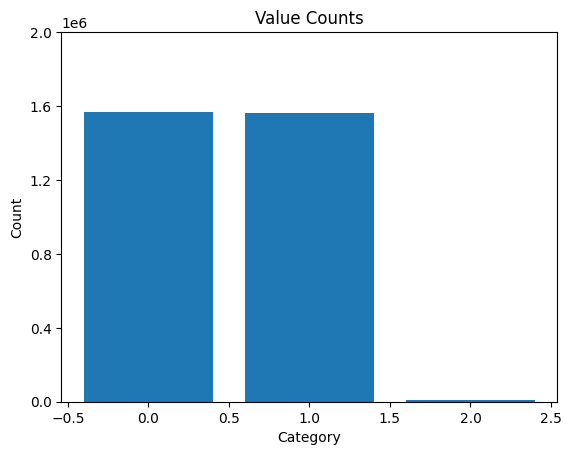

In [43]:


# Count individual values in the 'Category' column
value_counts = df["sentiment"].value_counts()

# Create bar chart
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts')

plt.yticks([0, 400000, 800000, 1200000, 1600000, 2000000])

# Display the plot
plt.show()



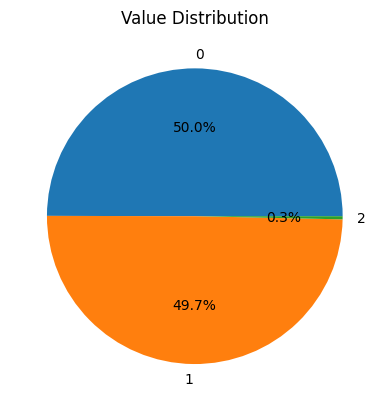

In [44]:

# Count individual values in the 'Category' column
value_counts = df["sentiment"].value_counts()

# Create pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Sentiment Distribution')

# Display the plot
plt.show()
